In [1]:
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow  # alternative is required as cv2.imshow() does not work in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Image size
size = 256  #@param{type:'slider', min:0, max:1028, step:1}

# Number of images
num = 5  #@param{type:'slider', min:0, max:10000, step:1}

count = 0

In [6]:
# Dataset A path
pathA = '/content/drive/MyDrive/Imageb'  #@param{type:'string'}

# Dataset B path
pathB = '/content/drive/MyDrive/Imagesa'  #@param{type:'string'}

# Save path
save_path = '/content/drive/MyDrive/combined'  #@param{type:'string'}

In [7]:
# Create the save directory if it doesn't exist
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [8]:
# Load images
def load_imgs(path, num, size):
    imgs = []
    for i in range(num):
        file_name = f"{i}.jpg"
        img_path = os.path.join(path, file_name)
        img = Image.open(img_path).resize((size, size))
        imgs.append(img)
    return imgs

def pil_to_cv(pil_img):
    return cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

# Function to preview images
def preview_images(images, title, img_num):
    plt.figure(figsize=(img_num * 2, img_num), dpi=150)
    for i in range(min(img_num, len(images))):
        plt.subplot(1, img_num, i + 1)
        plt.imshow(images[i])
        plt.title(f"{title} {i}", fontsize=10)  # Adjust fontsize as needed
        plt.axis('off')
    plt.show()

imgA = load_imgs(pathA, num, size)
imgB = load_imgs(pathB, num, size)

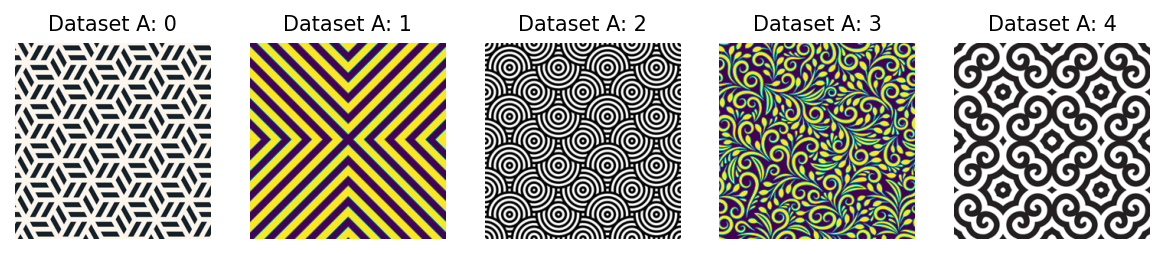

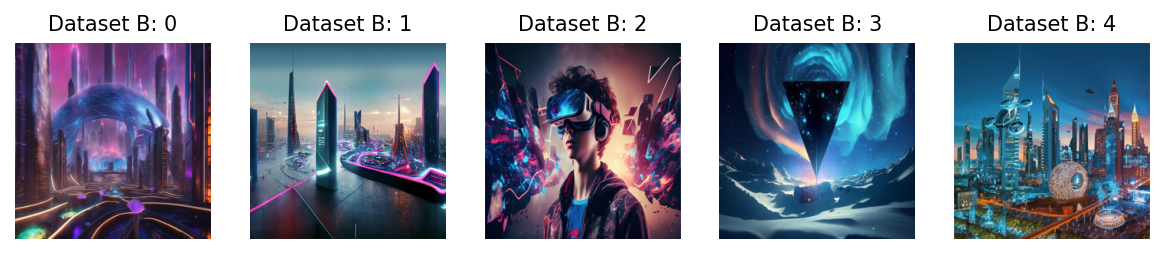

In [9]:
# Preview images from datasets A and B
# Number of images to preview
preview_num = 17  #@param{type:'slider', mix:0, max:100, stpe:1}
preview_images(imgA, "Dataset A:", preview_num)
preview_images(imgB, "Dataset B:", preview_num)

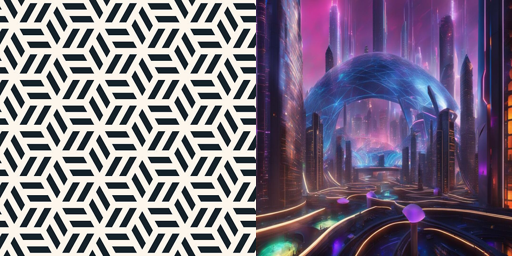


pair 1 completed


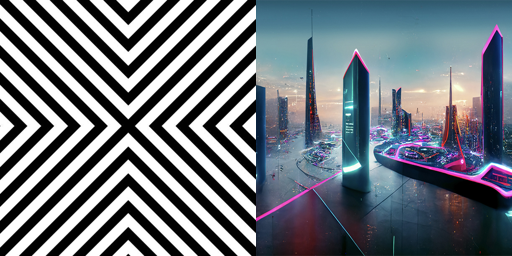


pair 2 completed


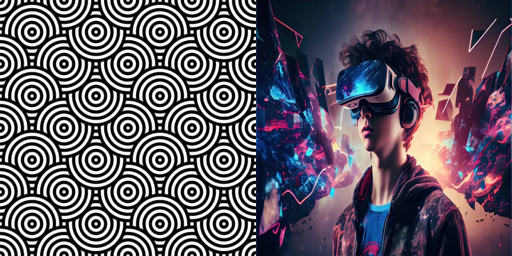


pair 3 completed


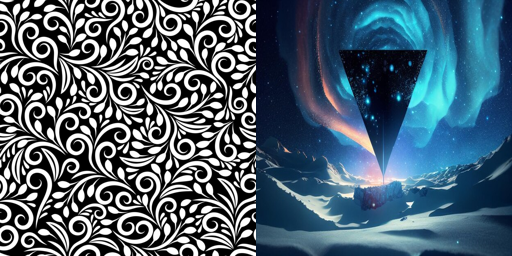


pair 4 completed


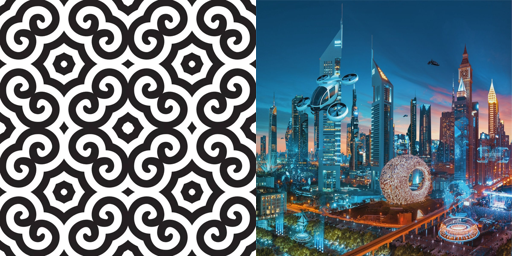


pair 5 completed
5 pairs ready for pix2pix!


In [10]:
# Pair images, save and preview each pair using OpenCV
for count in range(num):
    img_pair = Image.new('RGB', (size * 2, size))
    img_pair.paste(imgA[count], (0, 0))
    img_pair.paste(imgB[count], (size, 0))

    # Convert PIL image to OpenCV format
    img_pair_cv = pil_to_cv(img_pair)

    # Save the paired image
    paired_image_path = os.path.join(save_path, f"{count}.jpg")
    img_pair.save(paired_image_path)

    # Preview the paired image using OpenCV
    cv2_imshow(img_pair_cv)
    cv2.waitKey(500)  # Display each image for 500 ms
    cv2.destroyAllWindows()

    print(f"\npair {count + 1} completed")

cv2.destroyAllWindows()
print(f"{count + 1} pairs ready for pix2pix!")